### KHAI BÁO THƯ VIỆN

In [28]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import StackingRegressor
# from sklearn.metrics import accuracy_score # Có thể bỏ vì không cần trong bài toán hồi quy
from linearTuCode import *  # Thư viện này cần đảm bảo đã được cài đặt
import matplotlib.pyplot as plt


KeyError: "['Price'] not found in axis"

### ĐỌC FILE DỮ LIỆU

In [29]:
data = pd.read_csv('Gold_Price.csv')
print(data.columns)


Index(['Date', 'Open', 'High', 'Low', 'Volume', 'Chg%'], dtype='object')


### CHIA THÀNH CÁC TẬP TRAIN VÀ TEST

In [30]:
dt_train,dt_test = train_test_split(data,test_size=0.3,shuffle=True)

X_train = dt_train.drop(['Date','Chg%'], axis = 1) 
y_train = dt_train['Chg%'] 
X_test= dt_test.drop(['Date','Chg%'], axis = 1)
y_test= dt_test['Chg%']

### LINEAR REGRESSION TỰ CODE

In [19]:
linearTuCode = LinearRegressionTuCode()
linearTuCode.fit(X_train,y_train)
y_pred = linearTuCode.predict(X_test)

# in ra kết quả đánh giá mô hình
def NSE(y_test, y_pred):
    return 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2))

r2_score_linearTuCode = r2_score(y_test, y_pred)
nse_linearTuCode = NSE(y_test, y_pred)
mae_linearTuCode = mean_absolute_error(y_test, y_pred)
rmse_linearTuCode = np.sqrt(mean_squared_error(y_test, y_pred))


print('R2 scoree: ', r2_score(y_test, y_pred))
print('NSE scoree: ', NSE(y_test, y_pred))
print('MAE scoree: ', mean_absolute_error(y_test, y_pred))
print('RMSEE: ', np.sqrt(mean_squared_error(y_test, y_pred)))



R2 scoree:  0.9998262109137294
NSE scoree:  0.9998262109137294
MAE scoree:  71.44290122728434
RMSEE:  116.94268666402716


### LINEAR REGRESSION

In [9]:
reg = LinearRegression(fit_intercept=False).fit(X_train,y_train)
#de ko di qua goc toa do de + hang so b
y_predict = reg.predict(X_test)
y_test = np.array(y_test)

print("Thuc te\t\tDu doan\t\tChenh lech")
for i in range(0,len(y_test)):
    print(" ",y_test[i],"\t",y_predict[i],"\t", abs(y_test[i]-y_predict[i]))

# in ra kết quả đánh giá mô hình
def NSE(y_test, y_pred):
    return 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2))

r2_score_linear = r2_score(y_test,y_predict)
NSE_linear = NSE(y_test,y_predict)
MAE_linear = mean_absolute_error(y_test,y_predict)
RMSE_linear = np.sqrt(mean_squared_error(y_test,y_predict))

print("\nR2 LinearRegression :",r2_score(y_test,y_predict))
print("NSE LinearRegression :",NSE(y_test,y_predict))
print("MAE LinearRegression :",mean_absolute_error(y_test,y_predict))
print("RMSE LinearRegression :",np.sqrt(mean_squared_error(y_test,y_predict)))


NameError: name 'X_train' is not defined

### LASSO

In [16]:
lasso = Lasso(alpha=0.2,max_iter=1000,tol=0.01).fit(X_train,y_train)
#
y_predict = lasso.predict(X_test)
y_test = np.array(y_test)

print("Thuc te\t\tDu doan\t\tChenh lech")
for i in range(0,len(y_test)):
    print(" ",y_test[i],"\t",y_predict[i],"\t", abs(y_test[i]-y_predict[i]))

# in ra kết quả đánh giá mô hình
def NSE(y_test, y_pred):
    return 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2))

r2_score_lasso = r2_score(y_test,y_predict)
NSE_lasso = NSE(y_test,y_predict)
MAE_lasso = mean_absolute_error(y_test,y_predict)
RMSE_lasso = np.sqrt(mean_squared_error(y_test,y_predict))


print("\nR2 Lasso :",r2_score(y_test,y_predict))
print("NSE Lasso :",NSE(y_test,y_predict))
print("MAE Lasso :",mean_absolute_error(y_test,y_predict))
print("RMSE Lasso :",np.sqrt(mean_squared_error(y_test,y_predict)))

NameError: name 'X_train' is not defined

### NEURAL NETWORK

In [16]:
# MLP

mlp = MLPRegressor(hidden_layer_sizes=(100,100,100),activation='relu',solver='adam',max_iter=1000).fit(X_train,y_train)

y_predict = mlp.predict(X_test)
y_test = np.array(y_test)

print("Thuc te\t\tDu doan\t\tChenh lech")
for i in range(0,len(y_test)):
    print(" ",y_test[i],"\t",y_predict[i],"\t", abs(y_test[i]-y_predict[i]))

# in ra kết quả đánh giá mô hình
def NSE(y_test, y_pred):
    return 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2))

r2_score_mlp = r2_score(y_test,y_predict)
NSE_mlp = NSE(y_test,y_predict)
MAE_mlp = mean_absolute_error(y_test,y_predict)
RMSE_mlp = np.sqrt(mean_squared_error(y_test,y_predict))

print("\nR2 NeuralNetwork :",r2_score(y_test,y_predict))
print("NSE NeuralNetwork :",NSE(y_test,y_predict))
print("MAE NeuralNetwork :",mean_absolute_error(y_test,y_predict))
print("RMSE NeuralNetwork :",np.sqrt(mean_squared_error(y_test,y_predict)))


Thuc te		Du doan		Chenh lech
  29693 	 29712.643777473466 	 19.64377747346589
  43456 	 43103.45913740895 	 352.5408625910495
  37812 	 37702.33032922608 	 109.66967077391746
  27973 	 27802.43723495894 	 170.56276504106063
  28874 	 28836.320056272354 	 37.67994372764588
  37598 	 37565.61341066883 	 32.38658933116676
  48543 	 48408.10058810351 	 134.89941189649107
  47163 	 47073.68740543651 	 89.31259456348926
  31871 	 31859.980802428996 	 11.019197571004042
  47511 	 47262.915105097905 	 248.08489490209467
  29597 	 29590.902648748826 	 6.097351251173677
  31239 	 31327.872489505502 	 88.87248950550202
  44820 	 44965.79729359366 	 145.7972935936632
  28596 	 28508.6436139293 	 87.35638607069995
  31934 	 31888.48357066273 	 45.516429337269074
  46737 	 46713.49329367601 	 23.50670632399124
  26903 	 26930.279647192016 	 27.279647192015545
  37688 	 37709.44850051733 	 21.448500517326465
  27130 	 27246.034280609725 	 116.0342806097251
  47328 	 47313.683154363694 	 14.3168456363

### STACKING 

In [17]:
from collections import Counter
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neural_network import MLPRegressor
import numpy as np

class StackingRegressorCustom:
    def __init__(self, model1=LinearRegression(fit_intercept=False), model2=Lasso(alpha=1.0, max_iter=1000, tol=0.01),
                 model3=MLPRegressor(hidden_layer_sizes=(100, 100, 100), activation='relu', solver='adam', max_iter=1000),
                 final_estimator=LinearRegression(), cv=5, passthrough=True, n_jobs=-1):
        self.model1 = model1
        self.model2 = model2
        self.model3 = model3
        self.final_estimator = final_estimator
        self.cv = cv
        self.passthrough = passthrough
        self.n_jobs = n_jobs
        self.stacked_model = StackingRegressor(
            estimators=[('model1', model1), ('model2', model2), ('model3', model3)],
            final_estimator=final_estimator,
            cv=cv,
            passthrough=passthrough,
            n_jobs=n_jobs
        )

    def fit(self, X_train, y_train):
        self.model1.fit(X_train, y_train)
        self.model2.fit(X_train, y_train)
        self.model3.fit(X_train, y_train)
        self.stacked_model.fit(X_train, y_train)

    def vote(self, X_test):
        y_pred1 = self.model1.predict(X_test)
        y_pred2 = self.model2.predict(X_test)
        y_pred3 = self.model3.predict(X_test)
        y_pred_stacked = self.stacked_model.predict(X_test)
        # use counter to find the most common value
        y_pred = []
        for i in range(len(y_pred1)):
            y_pred.append(Counter([y_pred1[i], y_pred2[i], y_pred3[i], y_pred_stacked[i]]).most_common(1)[0][0])
        return y_pred

    def predict(self, X_test):
        y_pred1 = self.model1.predict(X_test)
        y_pred2 = self.model2.predict(X_test)
        y_pred3 = self.model3.predict(X_test)
        y_pred_stacked = self.vote(X_test)
        return y_pred_stacked
    
    

# Sử dụng class StackingRegressorCustom
stacked_classifier = StackingRegressorCustom()
stacked_classifier.fit(X_train, y_train)
y_predict_stacked = stacked_classifier.predict(X_test)

r2_score_stacked = r2_score(y_test,y_predict_stacked)
NSE_stacked = NSE(y_test,y_predict_stacked)
MAE_stacked = mean_absolute_error(y_test,y_predict_stacked)
RMSE_stacked = np.sqrt(mean_squared_error(y_test,y_predict_stacked))

print("r2_score of StackingRegressorCustom :",r2_score(y_test,y_predict_stacked))
print("NSE of StackingRegressorCustom :",NSE(y_test,y_predict_stacked))
print("MAE of StackingRegressorCustom :",mean_absolute_error(y_test,y_predict_stacked))
print("RMSE of StackingRegressorCustom :",np.sqrt(mean_squared_error(y_test,y_predict_stacked)))


r2_score of StackingRegressorCustom : 0.9998491274515768
NSE of StackingRegressorCustom : 0.9998491274515768
MAE of StackingRegressorCustom : 68.30580836891919
RMSE of StackingRegressorCustom : 110.62207416808988


### VẼ BIỂU ĐỒ SO SÁNH CÁC ĐỘ ĐO

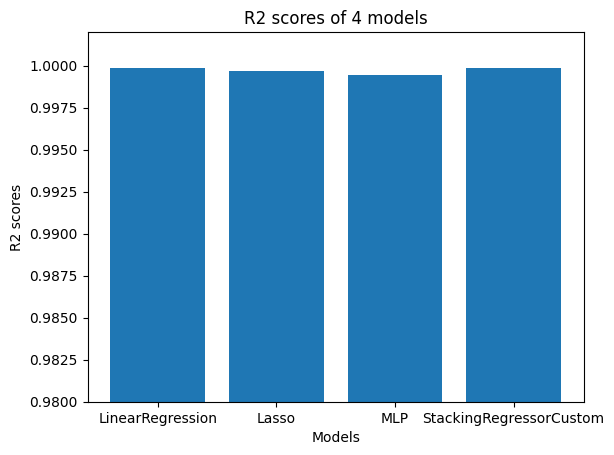

In [13]:
# vẽ biểu đồ cột so sánh độ đo r2 của 4 mô hình: LinearRegression, Lasso, MLP, StackingRegressorCustom
r2_scores = [r2_score_linear,r2_score_lasso,r2_score_mlp,r2_score_stacked]
labels = ['LinearRegression','Lasso','MLP','StackingRegressorCustom']
plt.bar(labels,r2_scores)
plt.title('R2 scores of 4 models')
plt.xlabel('Models')
plt.ylabel('R2 scores')
plt.ylim(0.98, 1.002)  # Set the y-axis limits
plt.show()

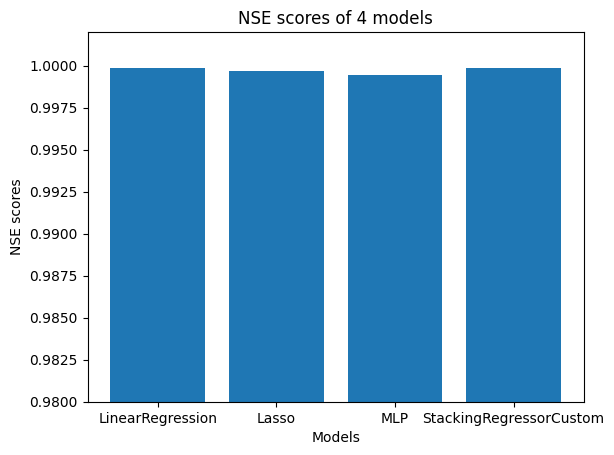

In [14]:
# vẽ biểu đồ cột so sánh độ đo NSE của 4 mô hình: LinearRegression, Lasso, MLP, StackingRegressorCustom
NSE_scores = [NSE_linear,NSE_lasso,NSE_mlp,NSE_stacked]
labels = ['LinearRegression','Lasso','MLP','StackingRegressorCustom']
plt.bar(labels,NSE_scores)
plt.title('NSE scores of 4 models')
plt.xlabel('Models')
plt.ylabel('NSE scores')
plt.ylim(0.98, 1.002)  # Set the y-axis limits
plt.show()

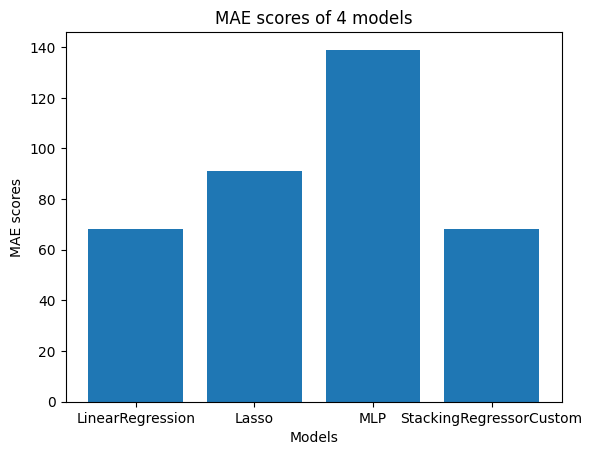

In [15]:
# vẽ biểu đồ cột so sánh độ đo MAE của 4 mô hình: LinearRegression, Lasso, MLP, StackingRegressorCustom
MAE_scores = [MAE_linear,MAE_lasso,MAE_mlp,MAE_stacked]
labels = ['LinearRegression','Lasso','MLP','StackingRegressorCustom']
plt.bar(labels,MAE_scores)
plt.title('MAE scores of 4 models')
plt.xlabel('Models')
plt.ylabel('MAE scores')
plt.show()


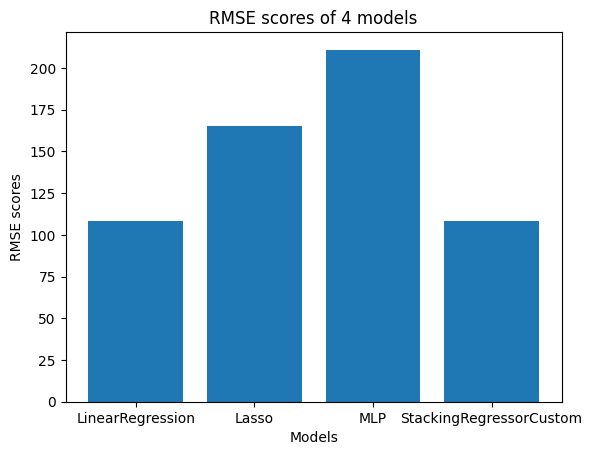

In [16]:
# vẽ biểu đồ cột so sánh độ đo RMSE của 4 mô hình: LinearRegression, Lasso, MLP, StackingRegressorCustom
RMSE_scores = [RMSE_linear,RMSE_lasso,RMSE_mlp,RMSE_stacked]
labels = ['LinearRegression','Lasso','MLP','StackingRegressorCustom']
plt.bar(labels,RMSE_scores)
plt.title('RMSE scores of 4 models')
plt.xlabel('Models')
plt.ylabel('RMSE scores')
plt.show()
